In [1]:
import numpy as np
import pandas as pd

Spatially Aggregated Models Can be Misleading

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0266010

In [2]:
data = pd.read_csv('../Data/PRIO-GRID Static Variables - 2023-09-28.csv')
data = data.set_index('gid')

In [3]:
yearly = pd.read_csv('../Data/PRIO-GRID Yearly Variables for 2009-2014 - 2023-09-28.csv')
yearly = yearly[yearly.year==2010]
yearly = yearly.set_index('gid')

In [6]:
data = pd.concat((data,yearly),axis=1)

In [7]:
bh_data = pd.read_csv('../Data/BH_violence.csv')

In [8]:
prio = data[data.index.isin(bh_data.priogrid_gid)].copy()
prio['event_count'] = bh_data.priogrid_gid.value_counts()

In [9]:
from sklearn.linear_model import PoissonRegressor
model = PoissonRegressor()

In [10]:
columns = ['agri_gc','shrub_gc','water_gc','urban_ih','bdist1','nlights_mean','capdist']

X = prio[columns].copy()
X['shrub_gc'] = np.log(.1+X['shrub_gc'])
X['water_gc'] = np.log(.1+X['water_gc'])
#X['pop_gpw_sum'] = np.log(.1+X['pop_gpw_sum'])

#X['urban_gc'] = np.log(1+X['urban_gc'])
#X['ttime_mean'] = np.log(1+X['ttime_mean'])
#X['harvarea'] = np.log(1+X['harvarea'])
X = X.fillna(X.mean()).values
X = (X-X.mean(axis=0))/X.var(axis=0)**0.5
y = prio['event_count'].values

array([[<Axes: title={'center': 'agri_gc'}>,
        <Axes: title={'center': 'shrub_gc'}>,
        <Axes: title={'center': 'water_gc'}>],
       [<Axes: title={'center': 'urban_ih'}>,
        <Axes: title={'center': 'bdist1'}>,
        <Axes: title={'center': 'nlights_mean'}>],
       [<Axes: title={'center': 'capdist'}>, <Axes: >, <Axes: >]],
      dtype=object)

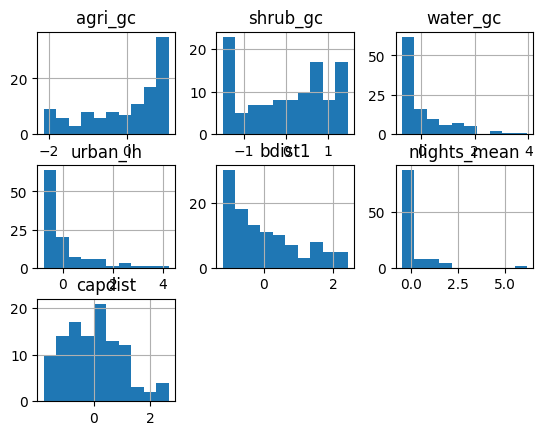

In [11]:
pd.DataFrame(X,columns=columns).hist()

In [12]:
model.fit(X,y)
model.score(X,y)

0.6880919171895972

In [13]:
model.coef_

array([ 0.90696467,  0.37697394, -0.43052496,  0.49566404, -0.36495286,
        0.48914072,  1.07248031])

In [14]:
import matplotlib.pyplot as plt
y_pred = model.predict(X)

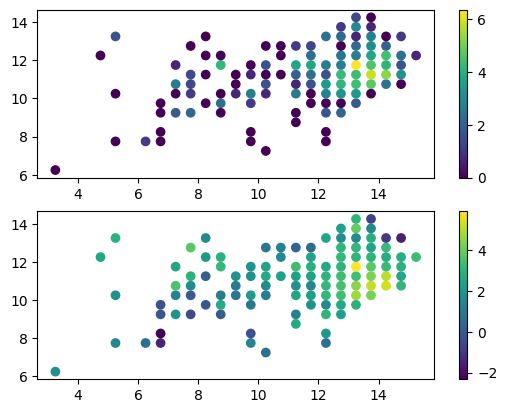

In [15]:
fig, ax = plt.subplots(2)
r0 = ax[0].scatter(prio.xcoord,prio.ycoord,c=np.log(prio.event_count))
fig.colorbar(r0,ax=ax[0])
r1 = ax[1].scatter(prio.xcoord,prio.ycoord,c=np.log(y_pred))
fig.colorbar(r1, ax=ax[1])
plt.show()

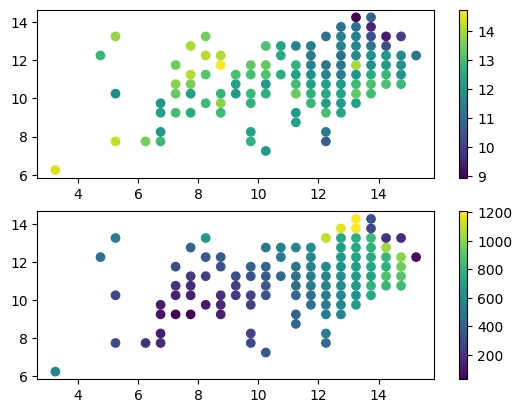

In [18]:
fig, ax = plt.subplots(2)
r0 = ax[0].scatter(prio.xcoord,prio.ycoord,c=np.log(prio.pop_gpw_sum))
fig.colorbar(r0,ax=ax[0])
r1 = ax[1].scatter(prio.xcoord,prio.ycoord,c=prio.capdist)
fig.colorbar(r1, ax=ax[1])
plt.show()

# Data Prep

In [ ]:
data = pd.read_csv('../Data/African_violence.csv')
bh = "Jama'atu Ahlis Sunna Lidda'awati wal-Jihad"
data = data[(data.side_a==bh) | (data.side_b==bh)]
data['date_time'] = data.date_start.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))
data['date'] = data.date_time.apply(lambda x: x.strftime("%Y-%m-%d"))
data['hour'] = data.date_time.apply(lambda x: x.strftime("%H"))
data['T'] = data.date_time.apply(lambda x: x.timestamp())
data['T'] = (data['T']-data['T'].min())/(60*60*24)
data_ready = data[['longitude','latitude','T','date','hour']].sort_values('T').copy()
data_ready.columns = ['X','Y','T','date','hour']
data_ready.to_csv("BH_filtered.csv",index=False)